This project will show if Fandango inflates their users scores to appear higher. This will look into the distribution of the real scores vs. the distribution of scores presented by Fandango

In [1]:
import pandas as pd

previous = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

previous.head()
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


I imported pandas to begin my analysis of the data and subsequently read in the two different datasets (Fandango vs real scores).

In [2]:
previous_Fandango = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
after_Fandango = after[['movie', 'year', 'fandango']].copy()

previous_Fandango.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


The population of interest in this project is the total number of ratings for movies within the Fandango database. In order to determine if the parameters were altered, we must analyze samples of the populations at two different states: before and after Hickey's analysis

Within the repository and the 538 article, samples were taken to analyze. Issues exist with the samples and studies done. First of all, criteria was set, whether the amount of ratings requires or year in which the movies came out, that eliminates movies from the sample. This is not done randomly, so it does not capture an accurate reprresentation of the population. 

I want to conduct an experiment that randomly samples from the population and provide a true estimate that can be relied upon without any bias.

The new goal of the project is instead of determining if the ratings has been altered after Hickey's inquiry, we can use the two datasets as a divider and determine if the ratings for Fandango differed from 2015 to 2016

In [3]:
sum(previous_Fandango['Fandango_votes'] < 30)

0

In [4]:
previous_Fandango['Year'] = previous_Fandango['FILM'].str[-5:-1]

Looking at the two different datasets, we want to isolate 2015 in the previous dataset, and then 2016 in the after dataset. The year of the movies release are the last five string characters in the FILM name column, so we isolate those string elements to then further isolate the year of the film.

In [5]:
previous_Fandango['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

As seen above, after isolating the year of the film, I calculated the value counts for year and saw majority were 2015. Below, I then created a new df for just 2015 fandango films.

In [6]:
fandango_2015 = previous_Fandango[previous_Fandango['Year'] == '2015'].copy()

In [7]:
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [8]:
after_Fandango['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [9]:
fandango_2016 = after_Fandango[after_Fandango['year'] == 2016].copy()

Just as with the other dataset, I am isolating for year to focus on 2015-2016 changes. Unlike the previous dataset, the after dataset has a column with year values. I called upon value_counts to determine the film counts for each year and then created a df for just 2016.

In [10]:
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

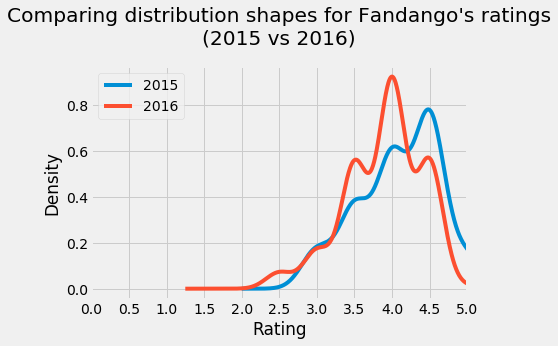

In [11]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label='2015', legend=True)
fandango_2016['fandango'].plot.kde(label='2016', legend=True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07)
plt.xlabel('Rating')
plt.xlim(0,5)
plt.xticks(arange(0,5.1,.5))
plt.show()

With both years isolated in a new DF, I created a kernal density chart to compare rating distributions based off year between the two separate years.

Both shapes of each distribution skews to the left. The center of the distribution for 2016 is slightly shifted to the left compared to 2016

From this graph we can see that majority of ratings are higher(within the high 3's to high 4's), which is interesting. Higher ratings is convenient for Fandango, as ticket sellers.

With 2016 slightly shifted left, that vindicates that the ratings in 2016 were slightly less than they were in 2015. 

In [12]:
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [13]:
fandango_2016['fandango'].value_counts(normalize=True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

I created frequency tables for both 2015 and 2016 data. This allows me to determine the frequency percentage of ratings for each years data.

Many insights can be taken from the relative frequencies:

- First the very high category, ratings of 5.0, decrease by more than 6% from 2015 to 2016
- However, ratings such as 3.5 and 4.0 increased from 2015 to 2016, by about 4%
- Ratings of 4.5 were more popular in 2015, 37% vs 24% in 2016
- The minimum rating value also decreaed in 2016, as 3% of the ratings came in at 2.5%

All of this indicates a definitive difference bewteen the distributions, but we need to discover more to dtermine direction and at what size the difference is at.

In [14]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

In [15]:
summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


Following the frequency table, I wanted to determine descriptive statistics for the two datasets and years. I called upon mean, mode, and median BIFs to create DF that showed those statistics for their respective years.

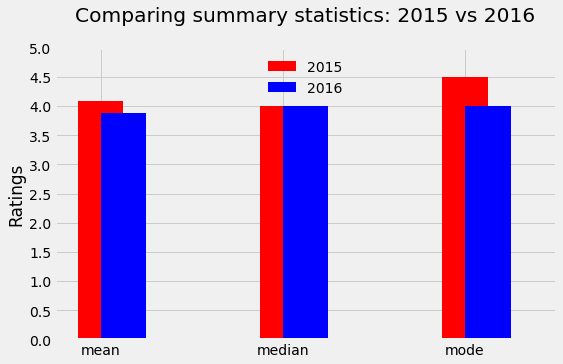

In [16]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = 'red', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = 'blue', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))
plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Ratings')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

Taking the DF that I created with the descriptive statistics, I wanted to visualize the values across the years. The bar chart above utilizes formating that clearly identifies specfic years and the respective stats for those years.

In [17]:
(summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]

0.04842683568951993

The mean of the ratings from 2015 to 2016 decreased by around 5%. The mode also decreased by .5 from 2015 to 2016. This confirms what we saw earlier, that the average ratings have decreased from 2015 to 2016